In [1]:
#import delle librerie
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

## Esercizio 1.1
### Test dell'algoritmo di generazione di numeri pseudo-casuali

##### A) Stima della media
In questo primo esercizio vogliamo effettuare un test di un generatore di numeri casuali in quanto vogliamo verificare che non vi siano eventuali correlazioni tra i dati dovuti al carattere non completamente casuale dell'algoritmo, che prevede necessariamente una natura deterministica nella sua implementazione. Innanzitutto vogliamo ottenere, per mezzo del generatore che ci è stato assegnato, la stima di:

$$\langle r \rangle = \int_0^1 r dr = 1/2$$ 

Nel perseguire questo scopo introduciamo anche il metodo conosciuto come $\textit{Data blocking method}$, che ci permette di avere un'idea dell'incertezza statistica sulla grandezza studiata, parametro ovviamente fondamentale per determinare la bontà delle nostre valutazioni.

Il metodo in questione procede nel seguente modo: si dividono il numero di tiri o più in generale gli step dell'algoritmo (nel nostro caso $M=10^5$) in blocchi (nel nostro caso $N=100$ e quindi con $L=N/M=1000$ step per blocco) e per ogni blocco si calcola la grandezza desiderata (e.g. la media o la varianza). Fatto ciò, per ogni blocco è interessante vedere come il valor medio sui blocchi e l'incertezza statistica dipendono dal numero di blocchi utilizzati. Pertanto progressivamente aumentando il numero di blocchi su cui facciamo la media, possiamo controllare il procedere dell'algoritmo, se converge o meno, se i dati ci sembrano o meno correlati, ecc. ecc..

Ci si aspetta d'altra parte che, data l'i-esima misura $A_i$, l'errore, dato dalla formula:
    $$\frac{\sigma}{\sqrt{N-1}} \simeq \sqrt{\frac{1}{N-1} \left[ \frac{1}{N} \sum_{i=1}^N A^2_i - \left( \frac{1}{N} \sum_{i=1}^N A_i \right)^2 \right]} $$
</p>
decresca con l'aumentare del numero di blocchi considerati e che il valore della media converga al valore aspettato.

Fissiamo pertanto il numero di blocchi a $N=100$ e carichiamo dai file creati con c++ i valori delle medie e dei rispettivi errori per ogni blocco:

$\textbf{oss}$: i valori nei file sono 200 in tutto: i primi sono le medie, i secondi 100 sono gli errori:

In [2]:
N=100; #N è il numero di blocchi
x=range(N) # (1,2,..100)
medie = np.loadtxt( 'medie.dat',max_rows=N ) #vettore di medie lungo N
err= np.loadtxt( 'medie.dat',skiprows=N ) #errore sulle medie


Ora realizziamo un grafico con l'andamento della media in funzione del numero di blocchi per valutare se l'algoritmo si comporta nella maniera da noi aspettata.

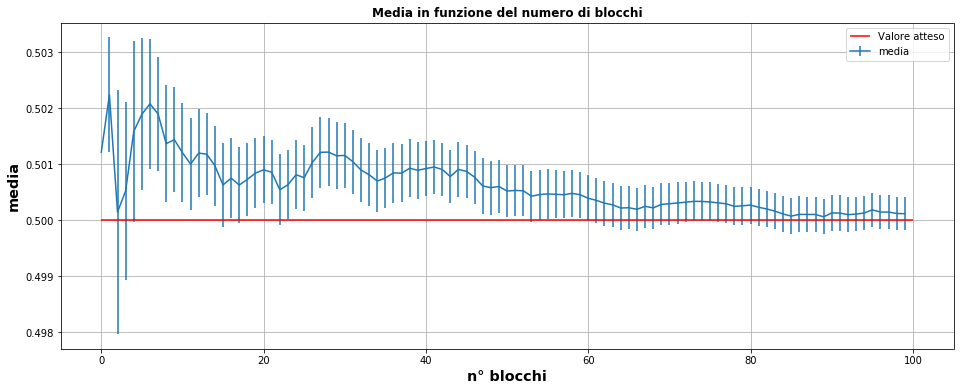

In [3]:
plt.figure(figsize=(16, 6))
plt.errorbar(x,medie,yerr=err,label="media")
plt.title("Media in funzione del numero di blocchi",weight='bold')
plt.xlabel('n° blocchi',size='x-large', weight='bold')
plt.ylabel('media',size='x-large', weight='bold')
plt.grid(True)
plt.hlines(0.5, 0, 100,"r",label="Valore atteso")
plt.legend()
plt.show();

Il valore della media converge al valore aspettato e le incertezze decrescono in maniera ragionevole all'aumentare del numero di blocchi; inoltre, il valore medio atteso dopo all'incirca 50 blocchi rientra nelle barre d'errore e praticamente non vi esce più, fornendoci pertanto una buona confidenza che l'algoritmo funzioni in maniera adeguata.

## Esercizio 1.2
#### B) Stima della varianza
Vogliamo ora stimare la varianza del generatore, data da:
$$ \sigma^2 = \int (r-1/2)^2 dr $$

e ci aspettiamo che questo valore converga a 1/12.

Come prima carichiamo i dati da file per ogni blocco, varianza e rispettiva incertezza per ciascuno di essi. I valori di $N$ blocchi e $M$ steps sono mantenuti invariati. La composizione dei file di input è analoga a prima.

In [4]:
varianze = np.loadtxt ("varianze.dat", max_rows=N) 
errvarianze = np.loadtxt ("varianze.dat", skiprows=N)

Grafichiamo ora i dati e i rispettivi errori in funzione del numero di blocchi considerato.

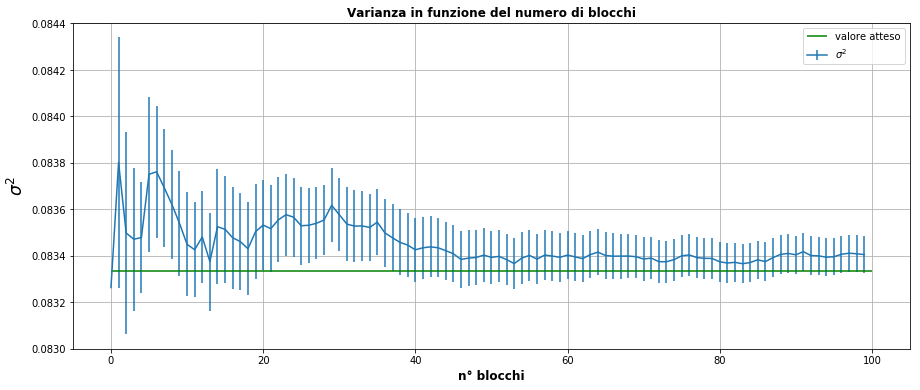

In [5]:
#grafico della varianze in funzione del numero di blocchi
plt.figure(figsize=(15, 6))
plt.errorbar(x,varianze,yerr=errvarianze,label="$\sigma^2$")
plt.title("Varianza in funzione del numero di blocchi",weight='bold')
plt.xlabel('n° blocchi',size='large', weight='bold')
plt.ylabel('$\sigma^2$',size='xx-large', weight='bold')
plt.hlines(1/12, 0, 100,"g",label="valore atteso")
plt.grid(True)
plt.legend()
plt.show()

Anche in questo caso il valore della varianza converge al valore atteso e si possono replicare le medesime considerazioni fatte per la media.

### C) Test del $\chi^2$


Verifichiamo ora che il generatore sia effettivamente uniforme effettuando un test del $\chi^2$, tramite la formula:

$$\chi^2 = \sum_{i=1}^M \frac{\left( n_i - n/M \right)^2}{n/M}$$

Per fare ciò estraiamo $n=10000$ numeri casuali fra zero e uno e dividiamo l'intervallo in $M=100$ intervalli equispaziati. Ci aspetteremo pertanto, se il generatore è effettivamente uniforme, che $n/M$ dei numeri estratti cadano in uno degli $M$ intervalli. Questo implica che $(n_i - n/M)^2 \simeq n/M$ e $\chi^2 \simeq 100$, ovvero il numero di intervalli scelti. Un valore più alto di quello aspettato del $\chi^2$ darebbe indicazione di una minor confidenza nel fatto che il generatore sia effettivamente uniforme. 
Il calcolo è quindi stato ripetuto per $j=100$ volte e i risultati per ogni stima del $\chi^2$ salvati su file.

Carichiamo i dati da file.

In [6]:
chi=np.loadtxt("chi.dat");

Grafichiamo i 100 chi quadri calcolati.

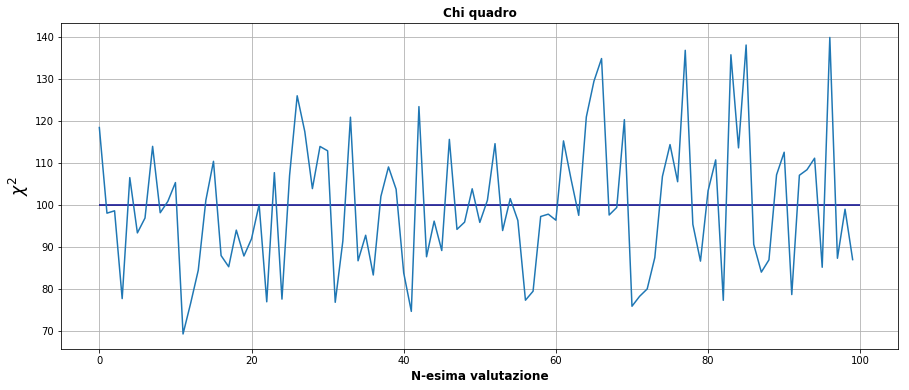

In [7]:
#grafico del chi quadro in funzione del numero di blocchi
plt.figure(figsize=(15, 6))
plt.plot(chi)
plt.title("Chi quadro", weight='bold')
plt.xlabel('N-esima valutazione',size='large', weight='bold')
plt.ylabel('$\chi^2$',size='xx-large', weight='bold')
plt.hlines(100, 0, 100,label="valore atteso",color="darkblue")
plt.grid(True)
plt.show()

Il valore del chi quadro come previsto oscilla attorno al valore di 100; non ci aspettiamo che esso debba convergere al valore atteso in quanto stiamo semplicemente ripetendo la sua stima  in maniera ogni volta indipendente dalla precedente.

# Esercizio 1.2

In questo esercizio vogliamo implementare nella classe random un modo per estrarre numeri casuali secondo alcune distribuzioni di probabilità scelte. Ovviamente per fare ciò dobbiamo partire dall'unico generatore di numeri casuali in nostro possesso, quello uniforme. Per estrarre casualmente dei numeri a partire da un generatore uniforme si usa il metodo della $\textit{cumulativa inversa}$.

Le distribuzioni di numeri casuali che andremo a costruire sono:
- Distrbuzione esponenziale $p(x) = \lambda e^{(-\lambda x)}$, $x\in [0;+\infty]$
- Distribuzione Lorentziana $p(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}$, $x\in [-\infty;+\infty]$

Accenniamo al metodo della cumulativa inversa per completezza: esso prevede che, presa la cumulativa della distribuzione di probabilità desiderata e invertita, si possa estrarre $y$ uniformemente e da questa ottenere una data distribuzione delle variabile $x$ tramite:

$$x=F^{-1}(y)$$

dove $F$ è la cumulativa della ricercata $p(x)$.

Dopo aver fatto questo vogliamo verificare il $\textit{Teorema del Limite Centrale}$, il quale prevede che la somma di un cospicuo numero di variabili estratte in maniera indipendente secondo una certa distribuzione a varianza finita tenderà a una distribuzione gaussiana. Chiaramente la media esprimerà un analogo comportamento.
Pertanto calcoliamo $n=10^4$ volte, per $N=1,2,10,100$, la media di $N$ variabili distribuite uniformemente, esponenzialmente e lorentzianamente. Ci aspettiamo che le prime due, per $N$ alto, possano essere fittate da una gaussiana, rispettando le ipotesi del teorema. Per quanto riguarda la somma di variabili distribuite lorentzianamente ci aspettiamo che esse possano invecere essere fittate da una lorentziana. 

Caricamento dei dati da file.

In [8]:
import scipy.stats as s #fit
n=10000 #tiri
unif1 = np.loadtxt("unif.dat", max_rows=n) *6#dati
exp1 =  np.loadtxt("exp.dat", max_rows=n)
lor1 =  np.loadtxt("lorentz.dat", max_rows=n)
unif2 = np.loadtxt("unif.dat", skiprows=n,max_rows=n)*6
exp2 =  np.loadtxt("exp.dat", skiprows=n,max_rows=n)
lor2 =  np.loadtxt("lorentz.dat", skiprows=n,max_rows=n)
unif3 = np.loadtxt("unif.dat", skiprows=2*n,max_rows=n)*6
exp3 =  np.loadtxt("exp.dat", skiprows=n*2,max_rows=n)
lor3 =  np.loadtxt("lorentz.dat", skiprows=2*n,max_rows=n)
unif4 = np.loadtxt("unif.dat", skiprows=3*n,max_rows=n)*6
exp4 =  np.loadtxt("exp.dat", skiprows=3*n,max_rows=n)
lor4 =  np.loadtxt("lorentz.dat", skiprows=3*n,max_rows=n)

Realizziamo quattro grafici per ogni dado.

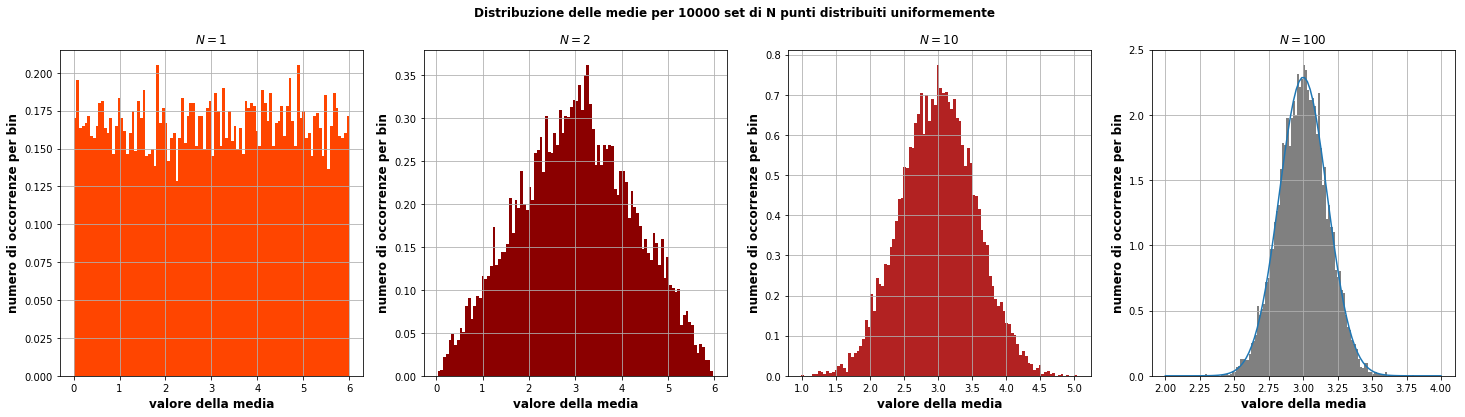

In [9]:
#dado uniforme
fig=plt.figure(figsize=(25, 6))
plt.suptitle('Distribuzione delle medie per 10000 set di N punti distribuiti uniformemente', weight='bold')
plt.subplot(141) # rows columns index
plt.hist(unif1,100, color='orangered', density=True)
plt.title('$N=1$')
plt.xlabel("valore della media",size='large', weight='bold')
plt.ylabel("numero di occorrenze per bin",size='large', weight='bold')
plt.grid(True) 

plt.subplot(142)
plt.hist(unif2,100, color='darkred', density=True)
plt.title('$N=2$')
plt.xlabel("valore della media",size='large', weight='bold')
plt.ylabel("numero di occorrenze per bin",size='large', weight='bold')
plt.grid(True) 

plt.subplot(143)
plt.hist(unif3,100, color='firebrick', density=True)
plt.title('$N=10$')
plt.xlabel("valore della media",size='large', weight='bold')
plt.ylabel("numero di occorrenze per bin",size='large', weight='bold')
plt.grid(True) 

plt.subplot(144)
plt.hist(unif4,100, color='grey', density=True)
plt.title('$N=100$')
plt.xlabel("valore della media",size='large', weight='bold')
plt.ylabel("numero di occorrenze per bin",size='large', weight='bold')
plt.grid(True) 

#fit del N=100 (l'l'ultimo dei quattro, in basso a destra)
parameter = s.norm.fit(unif4) #parameter from data
x = np.linspace(2,4, 100) #x to plot
y = s.norm.pdf(x, *parameter) #evaluate pdf
plt.plot(x, y)

plt.show()

é ben visibile nelle quattro figure il progressivo tendere della distribuzione della media a una distribuzione gaussiana. Per $N=100$ è stato sovrapposto al grafico il fit dell'istogramma.

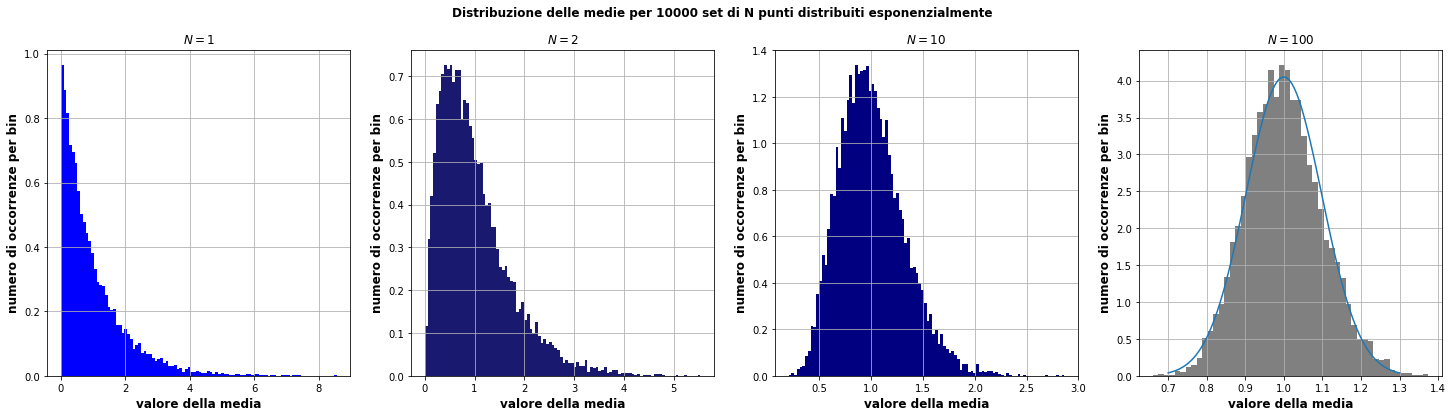

In [10]:
# dado esponenziale
fig=plt.figure(figsize=(25, 6))
plt.suptitle('Distribuzione delle medie per 10000 set di N punti distribuiti esponenzialmente', weight='bold')
plt.subplot(141)
plt.hist(exp1,100, color='blue', density=True)
plt.title('$N=1$')
plt.xlabel("valore della media",size='large', weight='bold')
plt.ylabel("numero di occorrenze per bin",size='large', weight='bold')
plt.grid(True) 

plt.subplot(142)
plt.hist(exp2,100, color='midnightblue', density=True)
plt.title('$N=2$')
plt.xlabel("valore della media",size='large', weight='bold')
plt.ylabel("numero di occorrenze per bin",size='large', weight='bold')
plt.grid(True) 

plt.subplot(143)
plt.hist(exp3,100, color='navy', density=True)
plt.title('$N=10$')
plt.xlabel("valore della media",size='large', weight='bold')
plt.ylabel("numero di occorrenze per bin",size='large', weight='bold')
plt.grid(True) 

plt.subplot(144)
plt.hist(exp4,50, color='grey', density=True)
plt.title('$N=100$')
plt.xlabel("valore della media",size='large', weight='bold')
plt.ylabel("numero di occorrenze per bin",size='large', weight='bold')
plt.grid(True) 

#fit del N=100 
parameter = s.norm.fit(exp4) #parameter from data
x = np.linspace(0.7,1.3, 100) #x to plot
y = s.norm.pdf(x, *parameter) #evaluate pdf
plt.plot(x, y)

plt.show()

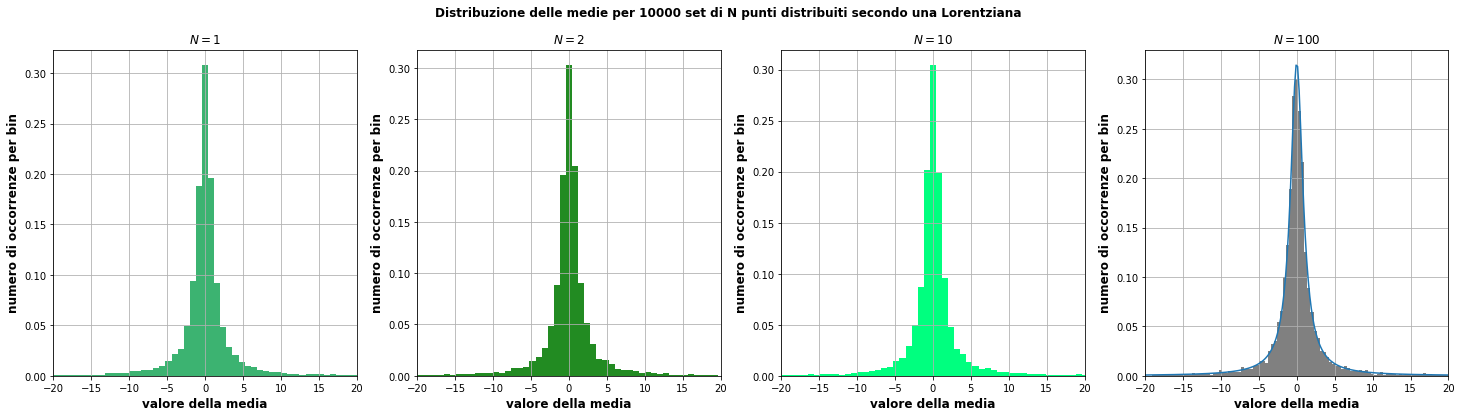

In [11]:
#dado lorentziano
fig=plt.figure(figsize=(25, 6))
plt.suptitle('Distribuzione delle medie per 10000 set di N punti distribuiti secondo una Lorentziana', weight='bold')
plt.subplot(141)
plt.hist(lor1,np.linspace(-100,100,250), color='mediumseagreen', density=True)
plt.title('$N=1$')
plt.xlim(-20,20)
plt.xlabel("valore della media",size='large', weight='bold')
plt.ylabel("numero di occorrenze per bin",size='large', weight='bold')
plt.grid(True) 

plt.subplot(142)
plt.hist(lor2,np.linspace(-100,100,250), color='forestgreen', density=True)
plt.title('$N=2$')
plt.xlim(-20,20)
plt.xlabel("valore della media",size='large', weight='bold')
plt.ylabel("numero di occorrenze per bin",size='large', weight='bold')
plt.grid(True) 

plt.subplot(143)
plt.hist(lor3,np.linspace(-100,100,250), color='springgreen', density=True)
plt.title('$N=10$')
plt.xlim(-20,20)
plt.xlabel("valore della media",size='large', weight='bold')
plt.ylabel("numero di occorrenze per bin",size='large', weight='bold')
plt.grid(True) 

plt.subplot(144)
plt.hist(lor4,np.linspace(-100,100,500), color='grey', density=True)
plt.title('$N=100$')
plt.xlim(-20,20)
plt.xlabel("valore della media",size='large', weight='bold')
plt.ylabel("numero di occorrenze per bin",size='large', weight='bold')
plt.grid(True) 

#fit del N=100 
parameter = s.cauchy.fit(lor4) #parameter from data
x = np.linspace(-20,20, 200) #x to plot
y = s.cauchy.pdf(x, *parameter) #evaluate pdf
plt.plot(x, y)

plt.show()

Come possiamo notare dai grafici le distribuzioni per $N=100$ sono ben fittate da una gaussiana per il dado esponenziale e quello uniforme, mentre per il dado lorentziano la distribuzione per $N=100$ è fittata invece da una distribuzione di Cauchy-Lorentz.

# Esercizio 1.3

L'idea di questo esercizio è stimare il valore di $\pi$ numericamente a partire dall'esperimento di Buffon. Esso prevede che un ago di lunghezza $l$, lanciato in un piano cartesiano solcato da linee parallele a distanza $d$, abbia probabilità di intersecare queste linee:

$$P = \frac{2L}{\pi d}$$

Pertanto se eseguiamo una simulazione dell'esperimento e misuriamo la quantità di aghi $N_{hit}$ che hanno colpito una linea, sul totale degli aghi lanciati $N_{thr}$, possiamo ricavare:

$$\pi = \frac{2L}{Pd} = \lim_{N_{thr} \to \infty}\frac{2LN_{thr}}{N_{hit}d}$$


Pertanto eseguiamo una simulazione dell'esperimento estraendo un punto a caso nel piano ( in realtà possiamo disinteressarci di una delle due dimensioni) e la sua inclinazione rispetto all'asse $x$ (le linee sono parallele all'asse $x$): esso intersecherà una linea se la coordinata $y$ del punto finale (calcolata semplicemente con la trigonometria) sarà maggiore di $d$ o minore di 0. In effetti stiamo semplificando l'esperimento di Buffon utilizzando una singola regione delimitata da due linee parallele, ma non vi è alcuna differenza per via della simmetria intrinseca del problema.

$\textbf{oss}$: stiamo usando $\pi$ per stimare $\pi$. Potremmo evitare ciò estraendo anche $x$ e da esso ricavare l'angolo di inclinazione della sbarra.

Carichiamo i dati da file e grafichiamo l'andamento del valore di $\pi$ in funzione del numero di blocchi con il rispettivo errore.

In [12]:
pi=np.loadtxt("buffon.dat", max_rows=100)
pi_err=np.loadtxt("buffon.dat", skiprows=100)

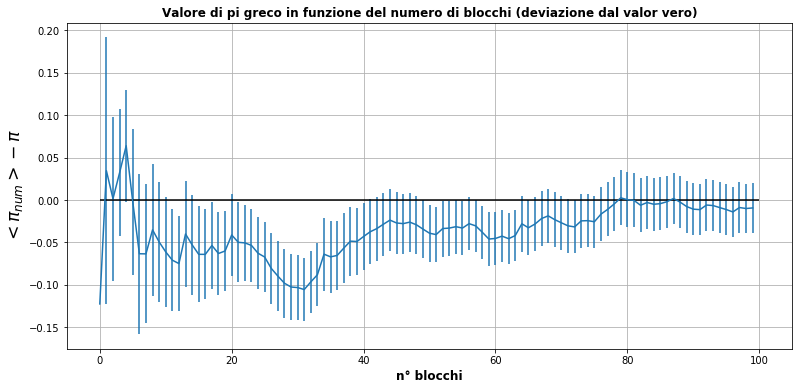

In [13]:
plt.figure(figsize=(13, 6))
plt.errorbar(range(0,100),pi-np.pi,yerr=pi_err)
plt.title("Valore di pi greco in funzione del numero di blocchi (deviazione dal valor vero)", weight='bold')
plt.xlabel('n° blocchi',size='large', weight='bold')
plt.ylabel('$<\pi_{num}>-\pi$',size='xx-large', weight='bold')
plt.hlines(0,0,100)
plt.grid(True)
plt.show()

Come si vede dal grafico il metodo utilizzato ottiene una stima precisa del valore di $\pi$ ed il valore vero è contenuto nelle barre di incertezza.